# Problem statement :

* Sprocket Central Pty Ltd , a medium size bikes & cycling accessories organisation


* Sprocket Central Pty Ltd needs help with its customer and transactions data. The organisation has a large dataset relating to its customers, but their team is unsure how to effectively analyse it to help optimise its marketing strategy. 


* Find out What are the trends in the underlying data?


* Which customer segment has the highest customer value?

## I would simplified the whole process into four steps:

1. Import and clean the data

2. Create the RFM table and calculate the RFM quantiles

3. Perform clustering and generate cluster label

4. Visualize the final result using the snake plot and heatmap

In [1]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
trans_data = pd.read_csv('transaction.csv')
trans_data.head()

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1,2950,2/25/2017,0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,NaN,NaN,
1,2,3120,5/21/2017,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,NaN,NaN,NaN
2,3,402,10/16/2017,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,NaN,NaN,NaN
3,4,3135,8/31/2017,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,NaN,NaN,NaN
4,5,787,10/1/2017,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,NaN,NaN,NaN


In [3]:
trans_data.describe()

,transaction_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date,Unnamed: 12,Unnamed: 13
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,0.0,0.0
mean,1613.252550,1738.246050,0.500800,1107.829449,556.046951,38199.776549,NaN,NaN
std,971.567389,1011.951046,0.500012,582.825242,403.951280,2861.004990,NaN,NaN
min,1.000000,1.000000,0.000000,12.010000,7.210000,33259.000000,NaN,NaN
25%,766.000000,857.750000,0.000000,575.270000,215.140000,35667.000000,NaN,NaN
50%,1571.000000,1736.000000,1.000000,1163.890000,507.580000,38206.000000,NaN,NaN
75%,2419.000000,2613.000000,1.000000,1635.300000,795.100000,40672.000000,NaN,NaN
max,3494.000000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000,NaN,NaN


In [4]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  int64  
 1   customer_id              20000 non-null  int64  
 2   transaction_date         20000 non-null  object 
 3   online_order             20000 non-null  int64  
 4   order_status             20000 non-null  object 
 5   brand                    20000 non-null  object 
 6   product_line             20000 non-null  object 
 7   product_class            20000 non-null  object 
 8   product_size             20000 non-null  object 
 9   list_price               20000 non-null  float64
 10  standard_cost            20000 non-null  float64
 11  product_first_sold_date  20000 non-null  float64
 12  Unnamed: 12              0 non-null      float64
 13  Unnamed: 13              0 non-null      float64
 14  Unnamed: 14           

In [5]:
trans_data.nunique()

transaction_id             3494
customer_id                3494
transaction_date            364
online_order                  2
order_status                  2
brand                         6
product_line                  4
product_class                 3
product_size                  3
list_price                  296
standard_cost               104
product_first_sold_date     101
Unnamed: 12                   0
Unnamed: 13                   0
Unnamed: 14                   1
dtype: int64

In [6]:
trans_data.customer_id.value_counts()

1068    14
2476    14
2183    14
2548    13
3232    13
        ..
2876     1
822      1
2477     1
1846     1
1544     1
Name: customer_id, Length: 3494, dtype: int64

In [7]:
trans_data.isnull().sum()

transaction_id                 0
customer_id                    0
transaction_date               0
online_order                   0
order_status                   0
brand                          0
product_line                   0
product_class                  0
product_size                   0
list_price                     0
standard_cost                  0
product_first_sold_date        0
Unnamed: 12                20000
Unnamed: 13                20000
Unnamed: 14                19999
dtype: int64

In [8]:
data = trans_data[['transaction_id','customer_id','transaction_date','standard_cost']]
data.head()

,transaction_id,customer_id,transaction_date,standard_cost
0,1,2950,2/25/2017,53.62
1,2,3120,5/21/2017,388.92
2,3,402,10/16/2017,248.82
3,4,3135,8/31/2017,381.10
4,5,787,10/1/2017,709.48


In [9]:
data.describe()

,transaction_id,customer_id,standard_cost
count,20000.000000,20000.000000,20000.000000
mean,1613.252550,1738.246050,556.046951
std,971.567389,1011.951046,403.951280
min,1.000000,1.000000,7.210000
25%,766.000000,857.750000,215.140000
50%,1571.000000,1736.000000,507.580000
75%,2419.000000,2613.000000,795.100000
max,3494.000000,5034.000000,1759.850000


In [10]:
df_revenue = data.groupby(['transaction_date'])['standard_cost'].sum().reset_index()
df_revenue.tail()

,transaction_date,standard_cost
359,9/5/2017,28719.676951
360,9/6/2017,28502.310000
361,9/7/2017,36732.580000
362,9/8/2017,33257.733902
363,9/9/2017,32058.430000


In [11]:
trans_data['transaction_date'].max()

'9/9/2017'

In [12]:
import datetime as dt
now = dt.date(2017, 12, 31)
data['transaction_date'] = pd.DatetimeIndex(data.transaction_date).date

<ipython-input-12-a6d93ba05b31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transaction_date'] = pd.DatetimeIndex(data.transaction_date).date


In [13]:
rfm = data.groupby('customer_id').agg({'transaction_date': lambda date: (now - date.max()).days, 
                                                    'transaction_id' : lambda num: len(num), 
                                                    'standard_cost' : lambda standard_cost: standard_cost.sum()})

In [14]:
rfm['transaction_date'] = rfm['transaction_date'].astype(int)
rfm.rename(columns={'transaction_date' : 'recency',
                   'transaction_id' : 'frequency',
                   'standard_cost' : 'monetary'}, inplace = True)

In [15]:
rfm.head()

,recency,frequency,monetary
customer_id,,,
1,8,11,6066.36
2,129,3,1922.81
3,103,8,6525.42
4,196,2,827.15
5,17,6,3508.26


# Interpretation:

1. Customer_id 1 has frequency: 11, monetary value: $6066, recency : 7days.

2. Customer_id 2 has frequency: 3, monetary value: $1923, recency : 128days.

# Let's check the details of the first customer

In [16]:
first_customer = trans_data[trans_data['customer_id']==1]
first_customer

,transaction_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Unnamed: 12,Unnamed: 13,Unnamed: 14
93,92,1,12/23/2017,0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,NaN,NaN,NaN
3764,92,1,4/6/2017,1,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,NaN,NaN,NaN
5156,92,1,5/11/2017,1,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,NaN,NaN,NaN
9784,92,1,1/5/2017,0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,NaN,NaN,NaN
13423,92,1,2/21/2017,0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,NaN,NaN,NaN
13643,92,1,5/19/2017,0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0,NaN,NaN,NaN
14485,92,1,3/27/2017,0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0,NaN,NaN,NaN
14930,92,1,12/14/2017,1,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,37337.0,NaN,NaN,NaN
15662,92,1,6/4/2017,1,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,40618.0,NaN,NaN,NaN
16422,92,1,12/9/2017,1,Approved,OHM Cycles,Road,medium,medium,742.54,667.40,37838.0,NaN,NaN,NaN


# RFM Analysis
## Recency-Frequency-Monetary

> RFM analysis allows you to segment customers by the frequency and value of purchases and identify those customers who spend the most money.

1. Recency — how long it’s been since a customer bought something from us

2. Frequency — how often a customer buys from us

3. Monetary value — the total value of purchases a customer has made</b>

## spliting the metrics into segments using quantiles.

* First we assign a score from 1 to 4 to each Recency, Frequency and monetary respectively.

* 1 is the highest value, and 4 is the lowest value.

* A final RFM score (overall value) is calculated simply by combining individual RFM Score numbers.

In [17]:
# calculating quartile values for each R,F,M
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [18]:
def Rscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    if x <= d[p][0.75]:
        return 3
    else:
        return 4
    

def FMscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    if x <= d[p][0.75]:
        return 2
    else:
        return 1

In [19]:
rfm['R-quartile'] = rfm['recency'].apply(Rscore, args=('recency',quantiles))
rfm['F-quartile'] = rfm['frequency'].apply(FMscore, args=('frequency',quantiles))
rfm['M-quartile'] = rfm['monetary'].apply(FMscore, args=('monetary',quantiles))
rfm.head()

,recency,frequency,monetary,R-quartile,F-quartile,M-quartile
customer_id,,,,,,
1,8,11,6066.36,1,1,1
2,129,3,1922.81,4,4,4
3,103,8,6525.42,4,1,1
4,196,2,827.15,4,4,4
5,17,6,3508.26,1,3,2


In [20]:
rfm['segmented_rfm'] = rfm['R-quartile'].map(str) + rfm['F-quartile'].map(str) + rfm['M-quartile'].map(str)

rfm['RFM_score'] = rfm[['R-quartile','F-quartile','M-quartile']].sum(axis=1)

In [21]:
rfm.head()

,recency,frequency,monetary,R-quartile,F-quartile,M-quartile,segmented_rfm,RFM_score
customer_id,,,,,,,,
1,8,11,6066.36,1,1,1,111,3
2,129,3,1922.81,4,4,4,444,12
3,103,8,6525.42,4,1,1,411,6
4,196,2,827.15,4,4,4,444,12
5,17,6,3508.26,1,3,2,132,6


In [22]:
print('Best Customer :',len(rfm[rfm['segmented_rfm'] == '111']))
print('Loyal customer :',len(rfm[rfm['F-quartile'] == 1]))
print('Big spender :',len(rfm[rfm['M-quartile'] == 1]))
print('Almost lost :',len(rfm[rfm['segmented_rfm'] == '134']))
print('Lost Customer :',len(rfm[rfm['segmented_rfm'] == '344']))
print('Lost cheap Customer :',len(rfm[rfm['segmented_rfm'] == '444']))

Best Customer : 199
Loyal customer : 737
Big spender : 874
Almost lost : 43
Lost Customer : 148
Lost cheap Customer : 308


In [23]:
rfm['RFM_score'].unique()

array([ 3, 12,  6, 10,  4,  8, 11,  7,  9,  5], dtype=int64)

In [24]:
# Define rfm_level function
def rfm_level(rfm):
    if rfm['RFM_score'] >= 11:
        return 'Needs Attention'
    elif ((rfm['RFM_score'] >= 10) and (rfm['RFM_score'] < 11)):
        return 'Promising'
    elif ((rfm['RFM_score'] >= 8) and (rfm['RFM_score'] < 10)):
        return 'Potential'
    elif ((rfm['RFM_score'] >= 6) and (rfm['RFM_score'] < 8)):
        return 'Loyal'
    elif ((rfm['RFM_score'] >= 4) and (rfm['RFM_score'] < 6)):
        return 'Champions'
    elif ((rfm['RFM_score'] >= 2) and (rfm['RFM_score'] < 4)):
        return "spent the most"
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)

rfm.head()

,recency,frequency,monetary,R-quartile,F-quartile,M-quartile,segmented_rfm,RFM_score,RFM_Level
customer_id,,,,,,,,,
1,8,11,6066.36,1,1,1,111,3,spent the most
2,129,3,1922.81,4,4,4,444,12,Needs Attention
3,103,8,6525.42,4,1,1,411,6,Loyal
4,196,2,827.15,4,4,4,444,12,Needs Attention
5,17,6,3508.26,1,3,2,132,6,Loyal


In [25]:
# Grouping customers by RFM level
rfm_agg = rfm.groupby('RFM_Level').agg({'recency' :'mean',
                                       'frequency':'mean',
                                       'monetary':['mean','count']}).round(1)

In [26]:
rfm_agg

recency frequency monetary      
                   mean      mean     mean count
RFM_Level                                       
Champions          30.4       8.4   4936.4   617
Loyal              40.1       6.4   3645.2   756
Needs Attention   136.4       3.0   1468.7   611
Potential          56.7       5.0   2678.4   947
Promising          77.2       4.1   2024.7   364
spent the most      8.8       9.4   5771.8   199

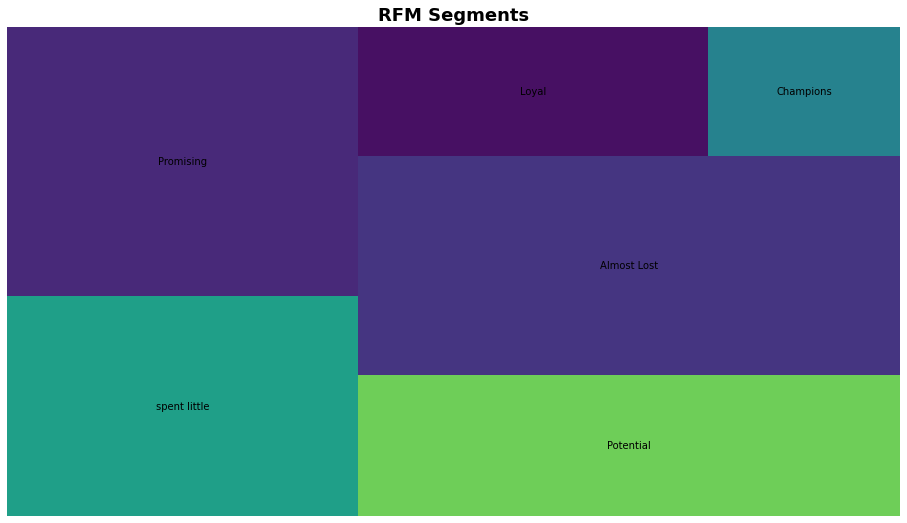

In [27]:
# RFM level visulation
import squarify
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_agg['Count'], 
              label=['spent little',
                     'Promising',
                     'Potential',
                     'Almost Lost',
                     'Loyal', 
                     'Champions', 
                     "spent the most"], alpha=1)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

# K-means Algorithm :


![title](1635141395545.png)


* Note : K-means gives the best result under the following conditions :

1. Data's Distributionnis not skewed.

2. Data is standardised (i.e mean of 0 and standard deviation of 1).


In [28]:
rfm_des = rfm[['recency', 'frequency', 'monetary']]
rfm_des.describe()

,recency,frequency,monetary
count,3494.000000,3494.000000,3494.000000
mean,61.813681,5.724098,3182.867494
std,57.787120,2.325873,1630.271757
min,1.000000,1.000000,13.440000
25%,18.000000,4.000000,1989.310000
50%,45.000000,6.000000,2974.750000
75%,86.000000,7.000000,4169.300000
max,354.000000,14.000000,12558.020000


* As we saw the Mean and Variances are differing so we need to apply Data Normalisation

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

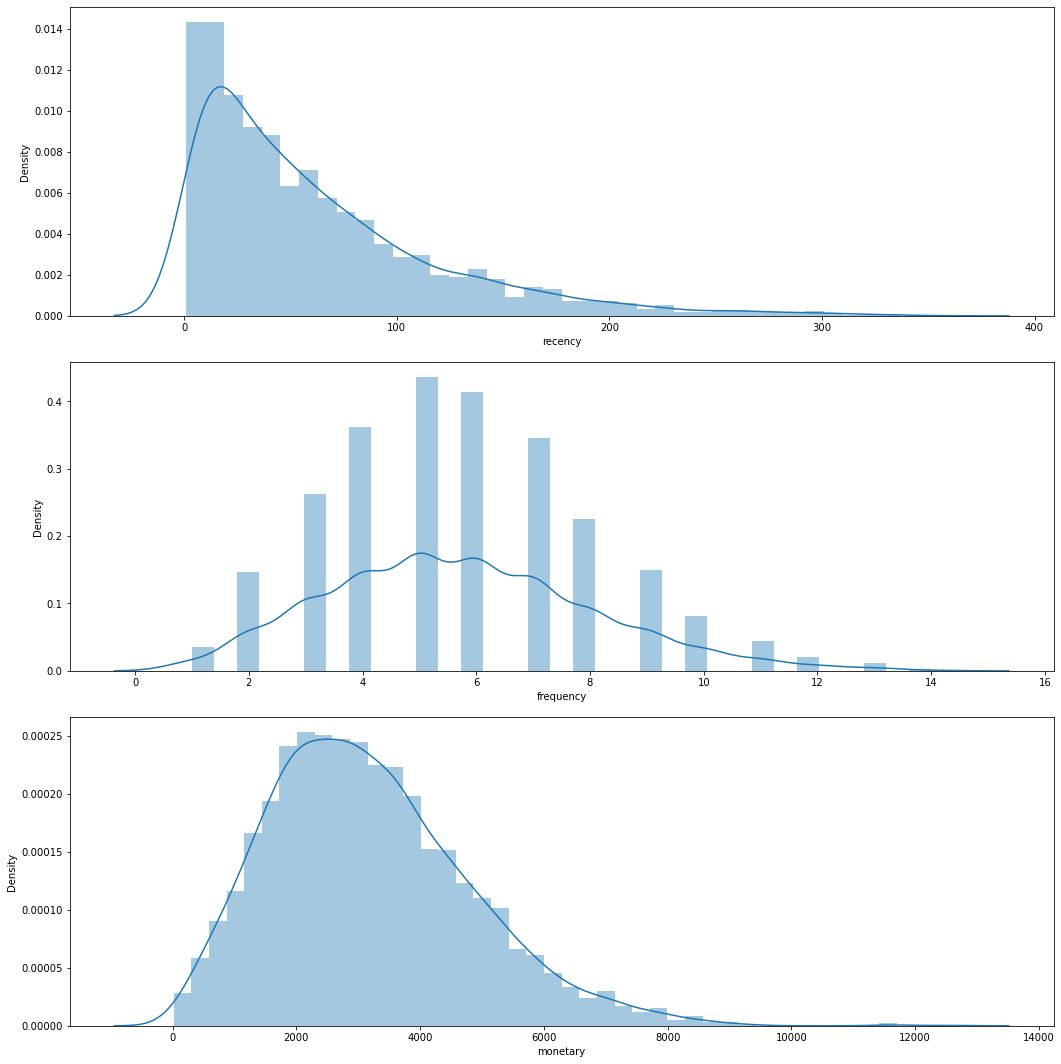

In [29]:
# first let's find the skewness in our data.
# Function to check skewness
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(3, 1, 1); sns.distplot(rfm.recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm.frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.monetary, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

* Unsymmetric Distribution of Data - We have to apply Square Root Transformation and verify the Distribution again

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

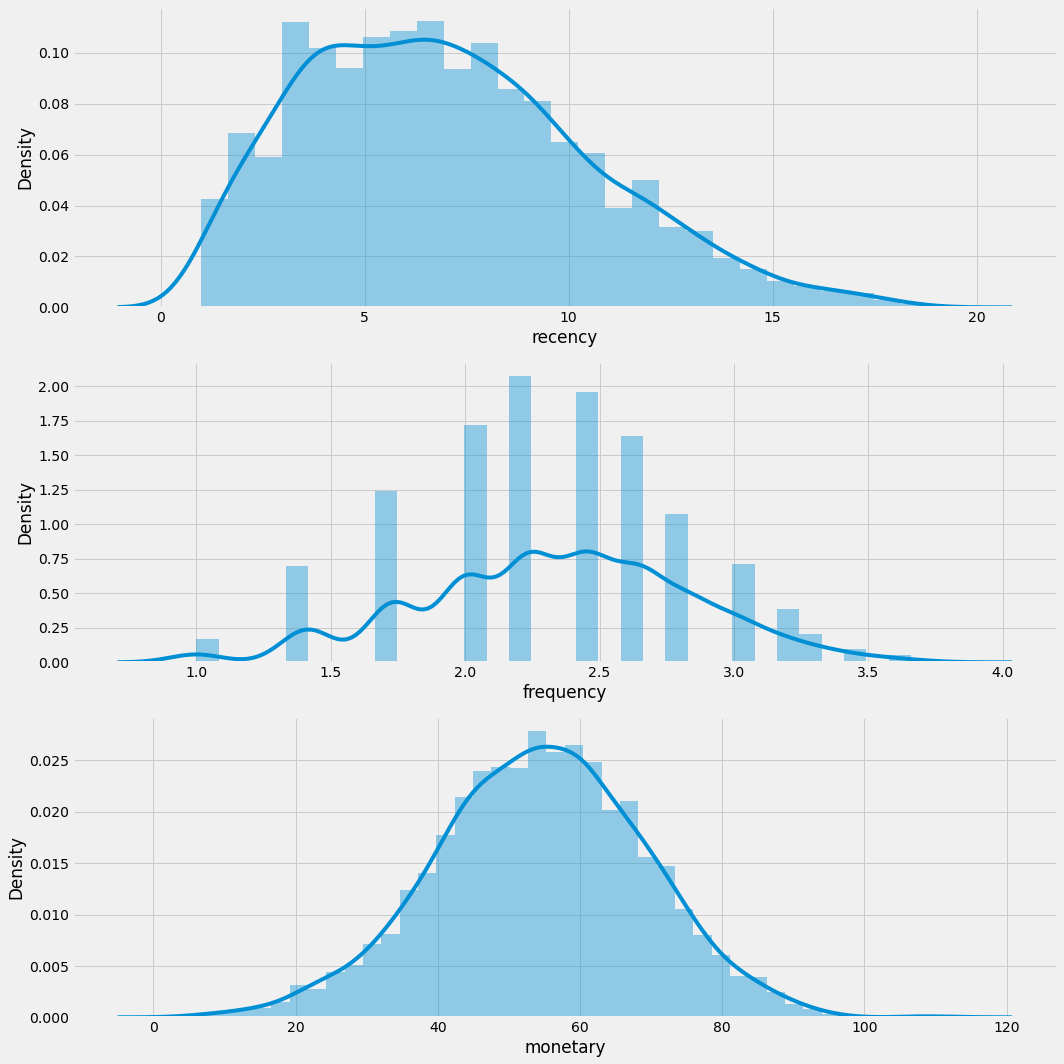

In [30]:
rfm_sqrt = rfm[['recency', 'frequency', 'monetary']].apply(np.sqrt, axis = 1).round(3)


f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(3, 1, 1); sns.distplot(rfm_sqrt.recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_sqrt.frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_sqrt.monetary, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [31]:
rfm_sqrt.skew()

recency      0.522606
frequency   -0.159613
monetary    -0.084148
dtype: float64

# Steps :

1. Preprocessing the Data
2. Determine the Number of Clusters
3. Running K Means Clustering on the Preprocessed Data
4. Analyse average RFM Values of each Cluster

# Why scaling is important?

* The location of each data point on the graph is determined by considering all information associated with the specific customer.

* If any of the information is not on the same distance scale, K-means might not form meaningfull clusters therefore we use standard scaler.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_sqrt)
rfm_normalized.shape

(3494, 3)

In [33]:
rfm_scaled = pd.DataFrame(rfm_normalized, columns = rfm_sqrt.columns)
rfm_scaled.head()

,recency,frequency,monetary
0,-1.201459,1.954119,1.578433
1,1.232808,-1.214514,-0.711278
2,0.887787,0.976541,1.773049
3,1.986774,-1.850239,-1.726401
4,-0.831896,0.218868,0.323421


# Finding the optimal number of clusters

* A different number of clusters can lead us to completely different results.
* It's important to get the optimal number of clusters for the analysis.
* To find out, we will apply ELBOW METHOD.
* Elbow method simplt tells the optimal cluster number for optimal intertia.

In [34]:
from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(rfm_scaled) 
    kmeanModel.fit(rfm_scaled)     
      
    distortions.append(sum(np.min(cdist(rfm_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / rfm_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(rfm_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / rfm_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_

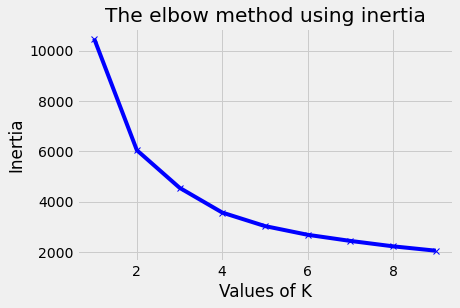

In [35]:
plt.plot(K , inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The elbow method using inertia')
plt.show()

* The elbow method shows 3 is the optimal one.
* We also go ahead with fewer or more clusters.
* we will be also trying our analysis with 3,4 and 5 clusters. 

In [36]:
# clustering
kc = KMeans(n_clusters=3,random_state=1)
kc.fit(rfm_scaled)

KMeans(n_clusters=3, random_state=1)

In [37]:
# Assign the clusters to datamart
rfm['K_Cluster'] = kc.labels_
rfm.head()

,recency,frequency,monetary,R-quartile,F-quartile,M-quartile,segmented_rfm,RFM_score,RFM_Level,K_Cluster
customer_id,,,,,,,,,,
1,8,11,6066.36,1,1,1,111,3,spent the most,1
2,129,3,1922.81,4,4,4,444,12,Needs Attention,0
3,103,8,6525.42,4,1,1,411,6,Loyal,1
4,196,2,827.15,4,4,4,444,12,Needs Attention,0
5,17,6,3508.26,1,3,2,132,6,Loyal,2


[]

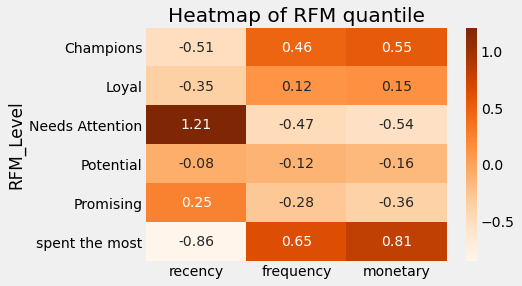

In [38]:
# the mean value in total 
total_avg = rfm.iloc[:, 0:3].mean()
total_avg
# calculate the proportional gap with total mean
cluster_avg = rfm.groupby('RFM_Level').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1
# heatmap with RFM
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True)
plt.title('Heatmap of RFM quantile')
plt.plot()

[]

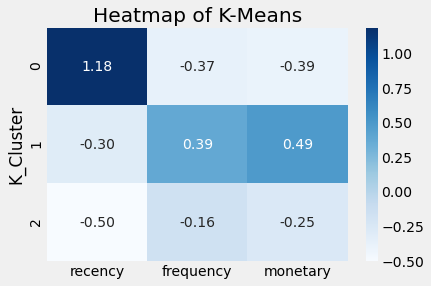

In [39]:
# calculate the proportional gap with total mean
cluster_avg_K = rfm.groupby('K_Cluster').mean().iloc[:, 0:3]
prop_rfm_K = cluster_avg_K/total_avg - 1
# heatmap with K-means
sns.heatmap(prop_rfm_K, cmap= 'Blues', fmt= '.2f', annot = True)
plt.title('Heatmap of K-Means')
plt.plot()

In [40]:
del rfm['RFM_Level']

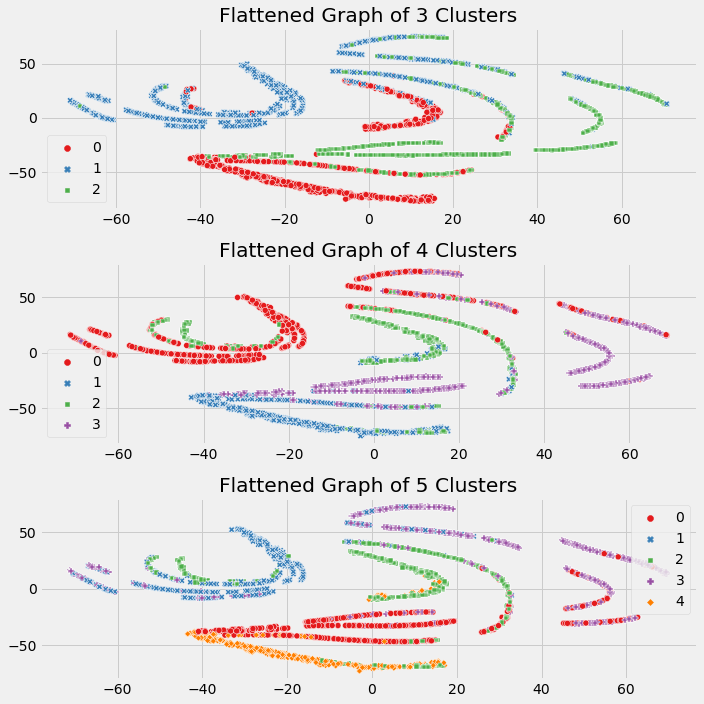

In [41]:
from sklearn.manifold import TSNE
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)
# Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(rfm_scaled, 3, rfm)
plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(rfm_scaled, 4, rfm)
plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(rfm_scaled, 5, rfm)
plt.tight_layout()

## Snake plot
* how customers view (or perceive) the different products on the market. One technique that clearly depicts these customer perceptions is "snake-plot". It is a technique that falls under the umbrella term of "perceptual mapping."

In [42]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=rfm.index, 
                                       columns=rfm.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['customer_id', 'Cluster'],
                        value_vars=['recency', 'frequency', 'monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

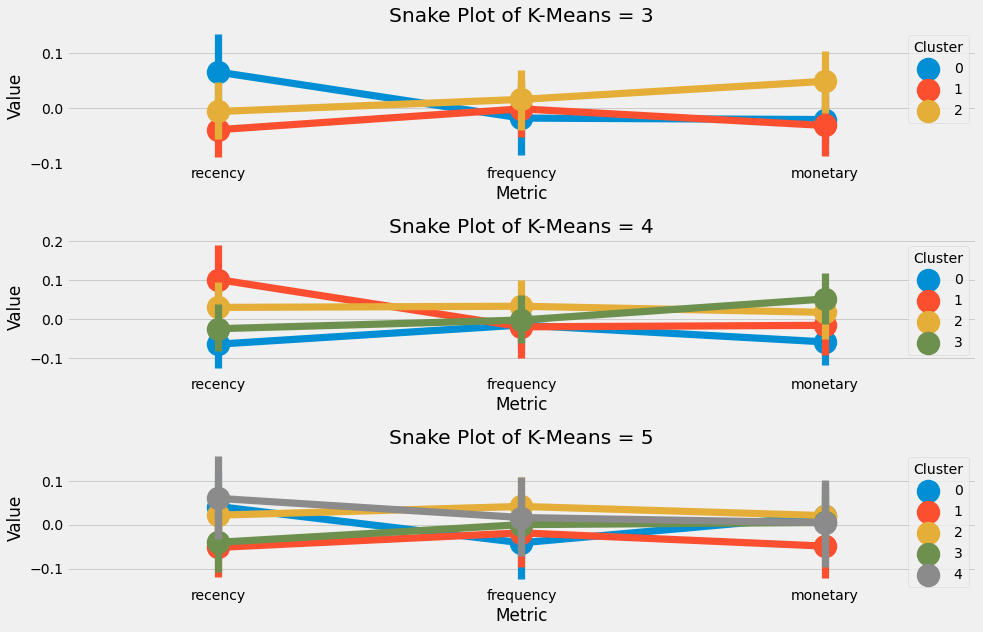

In [43]:
plt.figure(figsize=(14, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(rfm_scaled, df_rfm_k3, rfm)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(rfm_scaled, df_rfm_k4, rfm)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(rfm_scaled, df_rfm_k5, rfm)

plt.tight_layout()

* From the flattened graphs and the snake plots it is evident that having a cluster value of 3,segments our customers well.

# Summarizing my findings (clusters)

In [44]:
def rfm_values(df):
    df_new = rfm.groupby(['K_Cluster']).agg({
        'recency': 'mean',
        'frequency': 'mean',
        'monetary': ['mean', 'count']
    }).round(0)
    
    return df_new

In [45]:
rfm_values(df_rfm_k4)

recency frequency monetary      
             mean      mean     mean count
K_Cluster                                 
0           135.0       4.0   1933.0   878
1            43.0       8.0   4746.0  1353
2            31.0       5.0   2377.0  1263

# What does each cluster represent?

1. The first cluster belongs to the "Best Customers" segment which we saw earlier as they purchase recently (R=1), frequent buyers (F=1), and spent the most (M=1).


2. Customers in the second cluster can be interpreted as passerby customers as their last purchase is long ago (R=4),purchased very few (F=4) and spent little (M=4).Company has to come up with new strategies to make them permanent members.


3. The third cluster is more related to the "Almost Lost" segment as they Haven’t purchased for some time(R=3), but used to purchase frequently and spent a lot.


4. The last cluster are very Loyal Customers and they also spent a lot.